In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

import astropy.units as u
from astropy import constants
from astropy.io import fits
from astropy.coordinates import Galactic, Galactocentric, ICRS, LSR
from astropy.coordinates import (CartesianRepresentation,
                                 CartesianDifferential)


%matplotlib inline

Test angular momentum from Sales+2017 and Fritz+2018 combo data.

In [233]:
_coord = Galactic(l=265.9*u.degree, b=-49.6*u.degree).transform_to(ICRS)
ra = _coord.ra
dec = _coord.dec

In [234]:
coords_3d = ICRS(
    ra=ra,
    dec=dec,
    distance=30*u.kpc,
    pm_ra_cosdec=2.398*u.mas/u.yr*np.cos(ra.rad),
    pm_dec=-1.319*u.mas/u.yr,
    radial_velocity=62.8*u.km/u.s
)

In [235]:
coords_3d.transform_to(Galactocentric)

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in kpc
    (-9.76442046, -19.3938018, -22.81453664)
 (v_x, v_y, v_z) in km / s
    (81.9559499, -11.33545597, 127.0356407)>

First calculate the angular momentum direction given in Sales's paper:

In [236]:
LMC_sales = np.array([-0.97, 0.14, -0.18])

In [237]:
LMC_sales_r = np.linalg.norm(LMC_sales)

In [238]:
theta_LMC_sales = np.arctan2(LMC_sales[1], LMC_sales[0])
phi_LMC_sales = np.arccos(LMC_sales[2]/LMC_sales_r)

In [239]:
print(theta_LMC_sales, np.degrees(theta_LMC_sales))
print(phi_LMC_sales, np.degrees(phi_LMC_sales))

2.9982525985441915 171.78721981071413
1.7524359072260562 100.40718135123251


Read in a table of Milky Way dwarf masses.

In [250]:
dwarf_tbl = pd.read_table('/Users/spardy/Research/data/Auriga_data/McConnachie2012.tsv', delimiter=';')

Strip out any extra spaces to allow merging.

In [251]:
dwarf_tbl['Name'] = dwarf_tbl['Name'].apply(lambda e: e.strip())

Read in a table of positions and velocities.

In [252]:
df = pd.read_csv('/Users/spardy/Research/data/local_group_pos_vel_GaiaDR2_tableC4.txt')

Change Sagittarious's name to match with table above.

In [253]:
df.loc[7, 'Name'] = 'Sagittarius dSph'

Examine this table.

Merge the two tables together using the name column.

In [255]:
combined_df = pd.merge(dwarf_tbl, df, on='Name')
combined_df['Mass'] = combined_df['Mass'].astype(float)*1e+6

Examine the new table.

In [256]:
combined_df

,_RAJ2000,_DEJ2000,SubG,n_Name,Name,MType,RAJ2000,DEJ2000,D,u_D,...,-Z,U,+U,-U,V,+V,-V,W,+W,-W
0,283.8312,-30.5453,MW,G,Sagittarius dSph,dSph,18 55 19.5,-30 32 43,26,,...,-0.5,221.3,7.2,-6.2,-266.5,19.9,-22.5,197.4,18.6,-17.1
1,080.8937,-69.7561,MW,G,LMC,Irr,05 23 34.5,-69 45 22,51,,...,-1.4,-68.6,10.2,-9.7,-468.4,13.8,-13.5,201.0,18.0,-18.8
2,013.1867,-72.8286,MW,G,SMC,dIrr,00 52 44.8,-72 49 43,64,,...,-1.7,14.8,10.0,-10.0,-425.0,16.0,-15.2,167.5,13.0,-13.3
3,260.0517,+57.9153,MW,G,Draco,dSph,17 20 12.4,+57 54 55,76,,...,-3.1,35.9,13.9,-14.8,-247.6,7.1,-7.2,-157.7,10.1,-10.2
4,227.2854,+67.2225,MW,G,Ursa Minor,dSph,15 09 08.5,+67 13 21,76,,...,-2.0,-12.8,12.2,-12.5,-205.0,10.0,-10.3,-153.7,9.7,-8.8
5,015.0392,-33.7092,MW,G,Sculptor,dSph,01 00 09.4,-33 42 33,86,,...,-6.1,6.2,15.3,-14.1,-74.0,15.6,-14.0,-103.5,1.8,-1.8
6,100.4029,-50.9661,MW,G,Carina,dSph,06 41 36.7,-50 57 58,105,,...,-2.2,-51.1,18.9,-18.1,-298.4,9.8,-8.9,151.4,21.1,-23.6
7,039.9971,-34.4492,MW,G,Fornax,dSph,02 39 59.3,-34 26 57,147,,...,-11.0,34.2,22.5,-23.4,-386.0,38.0,-36.9,77.2,14.8,-14.3
8,168.3700,+22.1517,MW,G,Leo II,dSph,11 13 28.8,+22 09 06,233,,...,-12.3,13.2,73.3,-69.1,-253.9,73.8,-66.9,18.9,27.5,-28.9
9,152.1171,+12.3064,MW,"G,L",Leo I,dSph,10 08 28.1,+12 18 23,254,,...,-12.6,-177.0,80.3,-75.9,-243.0,61.0,-55.4,113.2,44.8,-47.4


And just get the order of the dwarfs.

In [257]:
combined_df.Name

0    Sagittarius dSph
1                 LMC
2                 SMC
3               Draco
4          Ursa Minor
5            Sculptor
6              Carina
7              Fornax
8              Leo II
9               Leo I
Name: Name, dtype: object

Make vectors of position and velocity.

Offset for the position of the sun

In [258]:
combined_df['Y'] += 8.3
combined_df['Z'] += 27e-3

In [259]:
R = combined_df[['X', 'Y', 'Z']] 

In [260]:
np.sqrt(np.sum(R**2, axis=1))

0     28.147738
1     43.486084
2     58.080628
3     83.291114
4     81.958679
5     85.442432
6     97.424827
7    144.949777
8    231.481450
9    250.204534
dtype: float64

In [261]:
np.linalg.norm(R - R.iloc[1], axis=1)

array([ 51.74765695,   0.        ,  23.16333309, 125.8024642 ,
       125.43751432,  65.62926177,  60.82877609, 114.46807415,
       255.22441106, 263.66789717])

And the solar motion.

In [262]:
combined_df['Vx'] = combined_df['U'] + 11.1
combined_df['Vy'] = combined_df['V'] + 232.24
combined_df['Vz'] = combined_df['W'] + 7.25

In [263]:
V = combined_df[['Vx', 'Vy', 'Vz']]

In [264]:
V

,Vx,Vy,Vz
0,232.4,-34.26,204.65
1,-57.5,-236.16,208.25
2,25.9,-192.76,174.75
3,47.0,-15.36,-150.45
4,-1.7,27.24,-146.45
5,17.3,158.24,-96.25
6,-40.0,-66.16,158.65
7,45.3,-153.76,84.45
8,24.3,-21.66,26.15
9,-165.9,-10.76,120.45


Take the cross product of R and V

In [306]:
#L = np.cross(R.values, V.values*combined_df['Mass'].values[:, None])
L = np.cross(R.values, V.values)

And compute the norm of the angular momentum for each galaxy.

In [307]:
L_r = np.linalg.norm(L, axis=1)  # 2-norm is default

Compute the unit angular momentum for each galaxy.

In [308]:
unit_L = L/L_r[:, None]

Add this unit vector into our dataframe

In [309]:
combined_df['Lx'] = unit_L[:, 0]
combined_df['Ly'] = unit_L[:, 1]
combined_df['Lz'] = unit_L[:, 2]

And examine the vectors.

In [310]:
combined_df[['Name', 'Lx', 'Ly', 'Lz']]

,Name,Lx,Ly,Lz
0,Sagittarius dSph,0.258418,-0.861219,-0.437633
1,LMC,-0.966343,0.008556,-0.257114
2,SMC,-0.905948,-0.344657,-0.245906
3,Draco,-0.918501,0.243220,-0.311768
4,Ursa Minor,-0.979028,-0.202032,-0.026214
5,Sculptor,0.995588,-0.085938,0.037661
6,Carina,-0.959139,0.246397,-0.139073
7,Fornax,-0.952540,-0.129261,0.275605
8,Leo II,0.406545,0.852570,0.328398
9,Leo I,-0.414843,-0.656488,-0.630023


In [110]:
galactic_coords = ICRS(
    ra=combined_df['_RAJ2000'].values.astype('float')*u.degree,
    dec=combined_df['_DEJ2000'].values.astype('float')*u.degree
).transform_to(Galactic)

In [111]:
combined_df['l'] = galactic_coords.l
combined_df['b'] = galactic_coords.b


Compute the first angle.

In [29]:
theta = np.arctan2(L[:, 1], L[:, 0])

And the second angle

In [30]:
phi = np.arccos(L[:, 2]/L_r)

Examine the angles in radians.

In [31]:
theta, phi

(array([-1.27928405,  3.1327384 , -2.77806294,  2.88273277, -2.93808959,
        -0.08610525,  2.89013648, -3.00671493,  1.12584203, -2.13435149]),
 array([2.02376097, 1.83083116, 1.81925044, 1.88784908, 1.59701306,
        1.53312644, 1.71032171, 1.291577  , 1.23618923, 2.25237935]))

And degrees.

In [32]:
np.degrees(theta), np.degrees(phi)

(array([ -73.29757687,  179.49268856, -159.17128172,  165.16842105,
        -168.34013321,   -4.93346751,  165.59262243, -172.27207561,
          64.50599679, -122.28933214]),
 array([115.95296239, 104.89889822, 104.23537215, 108.16578466,
         91.50210827,  87.84167429,  97.99421583,  74.00191114,
         70.82842569, 129.05183082]))

We appear to be very close to the angle provided by Sales.

Offset the angles to make the LMC appear at the center of the Aitoff projection.

In [76]:
x = theta-np.pi
x[x < -np.pi] += 2*np.pi

y = phi-np.pi/2.

## Ultrafaints

Repeat the above process with the smaller galaxies

Look at smaller galaxies from Simon et al. 2018, using mass values from Sales

In [240]:
sales_masses = pd.read_csv('/Users/spardy/Research/data/Auriga_data/sales_18_tbl1_masses.csv')
simon_phase_space = pd.read_csv('/Users/spardy/Research/data/Auriga_data/simon_2018_tbl1and3.csv')

In [241]:
simon_coords = ICRS(
    ra=simon_phase_space['RA'].values*u.deg,
    dec=simon_phase_space['DEC'].values*u.deg,
    distance=simon_phase_space['DIST'].values*u.kpc,
).transform_to(Galactocentric)

In [242]:
simon_phase_space['X'] = simon_coords.x.value
simon_phase_space['Y'] = simon_coords.y.value
simon_phase_space['Z'] = simon_coords.z.value

In [283]:
simon_phase_space['Vx'] = simon_phase_space['U'] + 11.1
simon_phase_space['Vy'] = simon_phase_space['V'] + 232.24
simon_phase_space['Vz'] = simon_phase_space['W'] + 7.25

Look at the smaller dwarfs from Fritz and Sales papers

In [244]:
fritz = pd.read_csv('/Users/spardy/Research/data/Auriga_data/fritz_2018_tbl2_selected.csv')
sales = pd.read_csv('/Users/spardy/Research/data/Auriga_data/sales_18_tbl1_selected.csv')

fritz_sales = pd.merge(left=fritz, right=sales, left_on='name', right_on='name')

Select only those that are not in the Simon table

In [281]:
fritz_sales = fritz_sales[~fritz_sales.name.isin(simon_phase_space.short_name)]

In [282]:
fritz_sales_ICRS = Galactic(
    l=fritz_sales['l'].values*u.degree,
    b=fritz_sales['b'].values*u.degree
).transform_to(ICRS)

fritz_sales_3d = ICRS(
    ra=fritz_sales_ICRS.ra,
    dec=fritz_sales_ICRS.dec,
    distance=fritz_sales.d_sun.values*u.kpc,
    pm_ra_cosdec=fritz_sales.mu_alpha.values*u.mas/u.yr*np.cos(fritz_sales_ICRS.ra),
    pm_dec=fritz_sales.mu_delta.values*u.mas/u.yr,
    radial_velocity=fritz_sales.v_sun.values*u.km/u.s
)
fritz_sales_names = fritz_sales['name']
fritz_sales_cartesian = fritz_sales_3d.transform_to(Galactocentric)

In [246]:
fritz_sales_V = np.stack((
    fritz_sales_cartesian.v_x.value,
    fritz_sales_cartesian.v_y.value,
    fritz_sales_cartesian.v_z.value
), axis=1)

fritz_sales_R = np.stack((
    fritz_sales_cartesian.x.value,
    fritz_sales_cartesian.y.value,
    fritz_sales_cartesian.z.value
), axis=1)

In [293]:
simon_selected = simon_phase_space[['short_name', 'X', 'Y', 'Z', 'Vx', 'Vy', 'Vz']]

In [299]:
uf_df = simon_selected.append(
    pd.DataFrame({'short_name': fritz_sales_names,
                  'X': fritz_sales_cartesian.x.value,
                  'Y': fritz_sales_cartesian.y.value,
                  'Z': fritz_sales_cartesian.z.value,
                  'Vx': fritz_sales_cartesian.v_x.value,
                  'Vy': fritz_sales_cartesian.v_y.value,
                  'Vz': fritz_sales_cartesian.v_z.value})
).reset_index(drop=True)

In [300]:
uf_df

,short_name,X,Y,Z,Vx,Vy,Vz
0,Tri 2,-29.637005,17.308807,-12.020220,-188.300000,-5.160000,262.650000
1,Seg 2,-32.073910,14.000095,-21.508934,168.700000,31.940000,115.450000
2,Hyd 1,1.829485,-19.631729,-16.518381,191.500000,-204.560000,280.850000
3,Hor 1,-7.319010,-50.204426,-71.019136,35.600000,-193.860000,169.850000
4,Ret 2,-9.714331,-20.637774,-24.387787,10.500000,-123.860000,225.850000
5,Car 2,-8.345766,-34.592284,-10.641260,-108.000000,-312.560000,154.350000
6,Car 3,-8.323391,-26.607033,-8.029378,32.400000,-170.260000,354.550000
7,UM 2,-32.660285,12.738346,21.202431,-146.100000,-112.360000,205.750000
8,Seg 1,-19.387754,-9.515183,17.789939,143.800000,-207.060000,-41.450000
9,UM 1,-61.085132,19.893955,79.306542,208.400000,-128.760000,-102.250000


In [311]:
uf_L = np.cross(uf_df[['X', 'Y', 'Z']], uf_df[['Vx', 'Vy', 'Vz']])
uf_L_r = np.linalg.norm(uf_L, axis=1)

In [312]:
uf_theta = np.arctan2(uf_L[:, 1], uf_L[:, 0])
uf_phi = np.arccos(uf_L[:, 2]/uf_L_r)

In [313]:
uf_x = uf_theta - np.pi
uf_x[uf_x < -np.pi] += 2*np.pi

uf_y = uf_phi - np.pi/2.

## Plot

Plot this in aitoff coordinates.

In [314]:
associated = [7, 2, 6]

In [315]:
unassociated = [5, 8, 0, 9, 3, 4]

In [394]:
additional_x_offsets = {
    'Seg 1': np.radians(-0.7),
    'UM 2': np.radians(-0.9),
    'Com': np.radians(-0.5),
    'Boo 1': np.radians(0)
    
}
additional_y_offsets = {
    'Seg 1': np.radians(2.2),
    'UM 2': np.radians(2.2),
    'Com': np.radians(3),
    'Boo 1': np.radians(1)
}

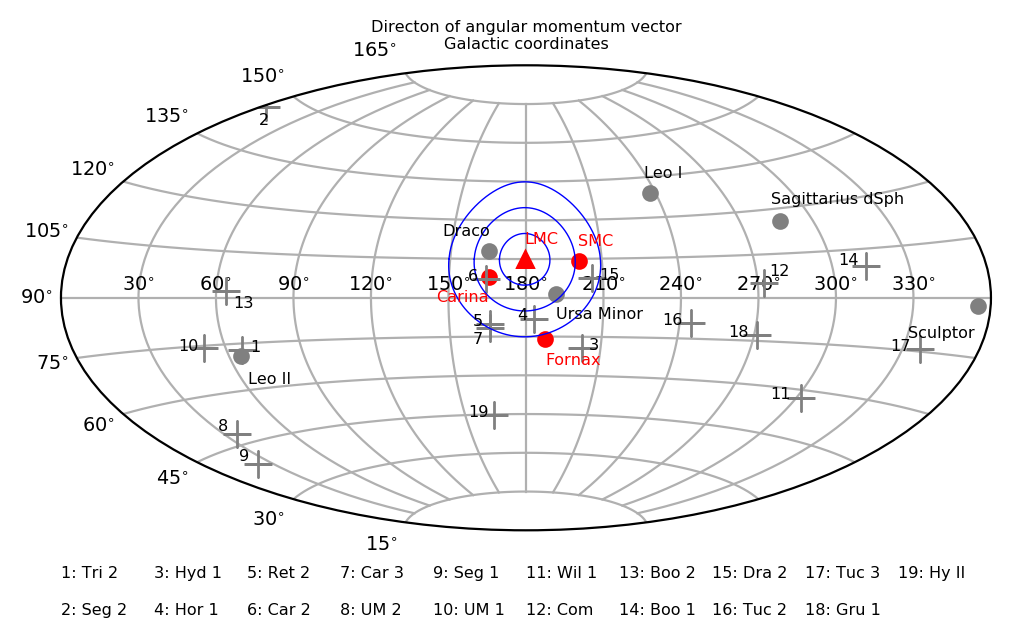

In [396]:
fig, axis = plt.subplots(1, subplot_kw={'projection': 'aitoff'}, dpi=200)

axis.plot(x[unassociated], y[unassociated], '.', color='gray', ms=10)
axis.plot(x[associated], y[associated], '.', color='red', ms=10)

axis.plot(x[1], y[1], 'r^', ms=6)# LMC

axis.plot(uf_x, uf_y, '+', color='gray', ms=10)

for i, (name, x_i, phi_i) in enumerate(zip(combined_df.Name, x, y)):
    
    # change some labels so that they don't overlap
    
    if phi_i < np.radians(10):
        va='top'
    else:
        va='bottom'
    
    if name in ['Draco', 'Carina', 'Sculptor']:
        ha = 'right'
    else:
        ha = 'left'
    
    offset = -0.085 if va == 'top' else 0.085
    
    text_color = 'black' if i in unassociated else 'red'
    
    axis.text(x_i, phi_i+offset, name, fontsize='xx-small', ha=ha, va=va, color=text_color)
    
for i, (name, x_i, phi_i) in enumerate(zip(uf_df['short_name'], uf_x, uf_y)):
    
    ha = 'right' if name not in ['Dra 2', 'Seg 2', 'Com',
                                 'Boo 2', 'Tri 2', 'Hyd 1'] else 'left'
    va = 'bottom' if name not in ['Seg 2', 'Boo 2', 'Car 3'] else 'top'
    offset_y = 0.025 if ha == 'bottom' else -0.025
    offset_x = -0.05 if ha == 'right' else 0.05
    
    if name in additional_x_offsets:
        offset_x += additional_x_offsets[name]
        offset_y += additional_y_offsets[name]
    
    axis.text(x_i+offset_x, phi_i+offset_y, f'{i+1}', fontsize='xx-small', ha=ha, va=va)

for i, name in enumerate(uf_df['short_name']):
    axis.annotate(xy=(0.1*(i//2), -0.1-0.08*(i%2)), s=f'{i+1}: {name}',
                  xycoords='axes fraction', fontsize='xx-small')
    
axis.set_xticklabels(['%d$^{\circ}$' % num for num in np.arange(30, 360, 30)], fontsize='x-small')
axis.set_yticklabels(['%d$^{\circ}$' % num for num in np.arange(15, 180, 15)], fontsize='x-small')

axis.set_title('Directon of angular momentum vector\nGalactic coordinates', fontsize='xx-small')

axis.grid(True)

x0 = x[1]
y0 = y[1]

#(x - x0)^2 + (y - y0)^2 == r^2
for r in np.arange(10, 40, 10):

    r = np.radians(r)

    x_circ = np.linspace(x0 - r, x0 + r, 1000)

    y_circ = np.sqrt(r**2 - (x_circ - x0)**2) + y0
    y_circ = np.append(y_circ, -np.sqrt(r**2 - (x_circ[::-1] - x0)**2) + y0)
    x_circ = np.append(x_circ, x_circ[::-1])
    axis.plot(x_circ, y_circ, color='blue', linewidth=0.5)
fig.savefig('/Users/spardy/Research/projects/Auriga/for_paper/angular_momentum.pdf', bbox_inches='tight')

Compute the cosine distance between each galaxy's angular momentum vector.

In [37]:
cos_distance = np.dot(unit_L, unit_L[1])

Sort these.

In [38]:
s = np.argsort(cos_distance)

And plot them with the names appearing on the x-axis.

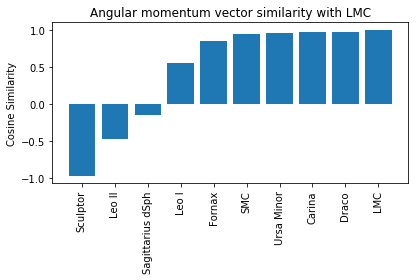

In [39]:
fig, axis = plt.subplots(1)
axis.bar(np.arange(len(s)), cos_distance[s])
axis.set_xticks(np.arange(len(s)))
_ = axis.set_xticklabels(combined_df.Name.iloc[s], rotation=90)
axis.set_title('Angular momentum vector similarity with LMC')
axis.set_ylabel('Cosine Similarity')

fig.tight_layout()

fig.savefig('/Users/spardy/Research/projects/Auriga/for_paper/angular_momentum_cosine.pdf')
